In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import random
import numpy.random as rng

import matplotlib.pyplot as plt

from datetime import datetime, date, timedelta
import re
import sys
from pathlib import Path

import json

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

import scipy.stats as stats



In [3]:


import theano
theano.config.warn.round=False
import pymc3 as pm
from sklearn.preprocessing import StandardScaler

N_total = 30
x = np.random.uniform(low=-1, high=1, size=N_total)  
y = np.random.uniform(low=-1, high=1, size=N_total)   


niter = int(1e4)
with pm.Model() as linreg:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)
    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    #trace = pm.sample(niter, random_seed=123)


## The following cell does not run for some reason on VSS

In [5]:
#it seems stuck here

with linreg:
    start= [{'a': 0.22,'b': 0.038,'sigma': 0.68+0.049},
            {'a': 0.1,'b':0,'sigma': 0.6}
           ]

    step = pm.Metropolis()
    multi_trace= pm.sample(10000, step=step, start=start,njobs = len(start), random_seed=123)    


100%|██████████| 10500/10500 [00:14<00:00, 715.12it/s]



a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.046            0.174            0.003            [-0.313, 0.371]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.305         -0.070         0.045          0.167          0.383


b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.092           0.101            0.002            [-0.289, 0.109]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.288         -0.159         -0.091         -0.026         0.114


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------

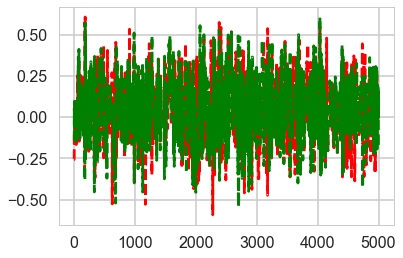

In [7]:
pm.summary(multi_trace)
color = ['r--','g--','k--','b--']
for i in range(0,2):
    plt.plot(multi_trace.get_values('a', chains=i)[5000:], color[i])
plt.show()